In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def f_x(x, r):
    return x*(r-np.exp(x))

def f_y(y, zeta):
    return y**4 -4*y + zeta

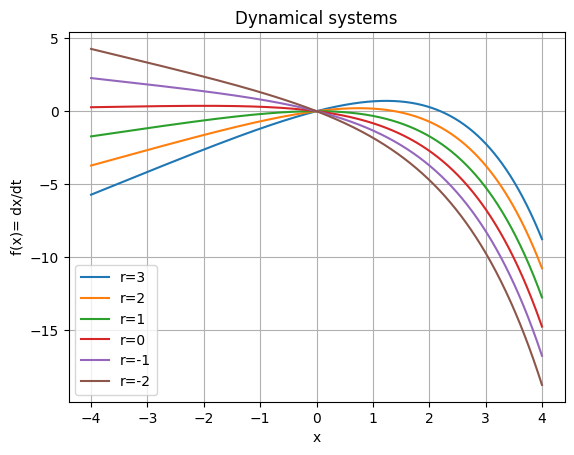

In [11]:
x = np.linspace(-2,2,1000)
list_r = [3,2,1,0,-1,-2]
for r in list_r:
    list_f4 = [f_x(i, r) for i in x]
    plt.plot(x4, list_f4, label = f"r={r}")
plt.grid()
plt.xlabel("x")
plt.ylabel("f(x)= dx/dt")
plt.title("Dynamical systems")
plt.legend()